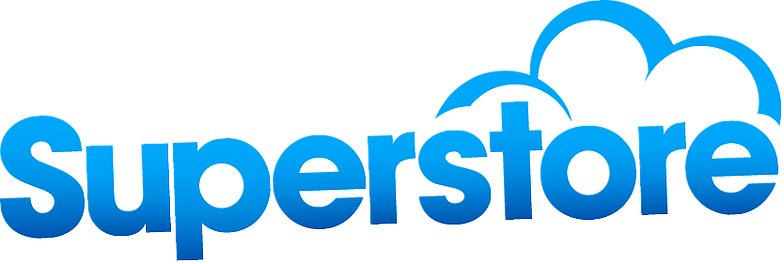

# **CrossValidation y mejora de modelos de ML**

**Nombre:** Leandro Montes Catari.

**Comisión:** 46320 - Data Science.

**Tutor:** Ernesto Surijon Frimis.

## **Abstracto con motivación y audiencia**

Este conjunto de datos `Super Sales Store` contiene datos de aproximadamente 10.000 registros de venta de una tienda en Estados Unidos en un periodo determinado. El conjunto de datos incluye datos categóricos de productos, clientes, tipos de envío y datos demográficos de los clientes. Las variables numéricas más importantes son el monto de las ventas, las ganancias, la cantidad de producto y los descuentos.

Este análisis de datos puede resultar de gran utilidad para una variedad de audiencias, incluidos gerentes y propietarios de tiendas minoristas que deseen comprender mejor el rendimiento de sus productos y clientes. También puede ser de interés para analistas de mercado que buscan identificar tendencias de compra y preferencias de los clientes. Además, los especialistas en logística y gestión de inventarios podrían beneficiarse al identificar patrones de demanda y optimizar las estrategias de almacenamiento y distribución.

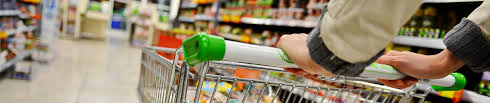

✅ **Objetivo**

El objetivo principal de esta investigación es descubrir información procesable a partir de datos de ventas que puedan ayudar a la tiendan a tomar decisiones. El análisis se centrará en comprender el comportamiento de los clientes, las tendencias de ventas y el desempeño regional para identificar oportunidades de mejora y maximización de ventas y ganancias.


✅ **Contexto Empresarial**

La empresa enfrenta el desafío de aumentar las ventas, adquirir nuevos clientes y expandirse a nuevos mercados para seguir siendo competitiva y lograr un crecimiento sostenible.


✅ **Problema Comercial**

La empresa necesita identificar áreas de mejora en sus estrategias de ventas, orientación a clientes y expansión regional para maximizar la rentabilidad. Por lo que analizaremos a fondo los datos y con ayuda de las visualizaciones podremos dar respuesta a las preguntas que se nos vayan presentando.


✅ **Contexto Analitico**

Esta investigación empleará técnicas de análisis datos para extraer información significativa del conjunto de datos. Los hallazgos se utilizarán para informar decisiones comerciales e impulsar iniciativas de crecimiento estratégico.


✅ **Diccionario**


`Row ID` = ID único para cada fila.

`Order ID` = ID de pedido único para cada Cliente.

`Order Date` = Fecha de pedido del producto.

`Ship Date` = Fecha de Envío del Producto.

`Ship Mode` = Modo de Envío especificado por el Cliente.

`Customer ID` = ID único para identificar a cada Cliente.

`Customer Name` = Nombre del Cliente.

`Segment` = El segmento al que pertenece el Cliente.

`Country` = País de residencia del Cliente.

`City` = Ciudad de residencia del Cliente.

`State` = Estado de residencia del Cliente.

`Postal Code` = Código Postal de cada Cliente.

`Region` = Región a la que pertenece el Cliente.

`Product ID` = ID único del Producto.

`Category` = Categoría del producto solicitado.

`Sub-Category` = Subcategoría del producto solicitado.

`Product Name` = Nombre del Producto.

`Sales` = Ventas del Producto.

`Quantity` = Cantidad del Producto.

`Discount` = Descuento proporcionado.

`Profit` = Beneficio.

##**Preguntas / Hipotesis**

En base a entregas anteriores y para complementar el estudio se realizan las siguientes preguntas, que se iran respondiendo en el desarrollo de este estudio.

1. ¿Cómo han cambiado las ventas con el tiempo?
2. ¿Qué regiones están obteniendo buenos resultados y cuáles necesitan mejorar en términos de ventas?
3. ¿Qué segmentos de clientes son más propensos a comprar en cada región?
4. ¿Qué categoría de productos genera las mayores ingresos y ganancias?

##**Importación de Librerias y Lectura de Archivo .CSV**

In [3]:
!pip install catboost #Instalamos CatBoost para poder importar CatBoostRegressor
!pip install --pre pycaret #Instalamos libreria Pycaret que nos ayudara a evaluar varios modelos de ML de manera sencilla.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 

In [31]:
# Importamos librerias que estaremos usando
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ctypes import alignment
from plotly.subplots import make_subplots
import seaborn as sns
import warnings
%matplotlib inline
import missingno as msno
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
#from sklearn.linear_model import LassoLars
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from pycaret.regression import *
from mlxtend.plotting import plot_confusion_matrix
from sklearn.decomposition import PCA

In [5]:
# Conectamos google colab al drive.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# Leemos el Archivo .csv
data = pd.read_csv('/content/gdrive/MyDrive/Colab-Notebooks/Superstore Sales/Superstore.csv', encoding='windows-1254')

## **Analisis Exploratorio de los Datos (EDA)**

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')
data['Year'] = data['Order Date'].dt.year #creamos nueva columna año
data["Month"] = pd.DatetimeIndex(data["Order Date"]).month
data["Month Name"] = data["Order Date"].dt.month_name()

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month Name
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October


In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Month Name'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Year,Month
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000


In [ ]:
data.shape

(9994, 24)

## **Limpieza**

**Analisis de Duplicados**

In [ ]:
#Verificamos si tenemos valores que se duplicados.
(data.duplicated().sum())
print(f'Contamos con un total de {data.duplicated().sum()} valores duplicados')

Contamos con un total de 0 valores duplicados


**Analisis de Nulos**

In [ ]:
#Verificamos si contamos con datos nulos en el dataset
print(data.isna().sum())
print(f'Contamos con un total de {data.isnull().sum().sum()/data.shape[0] * 100} valores NaN')

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
Month Name       0
dtype: int64
Contamos con un total de 0.0 valores NaN


<Axes: >

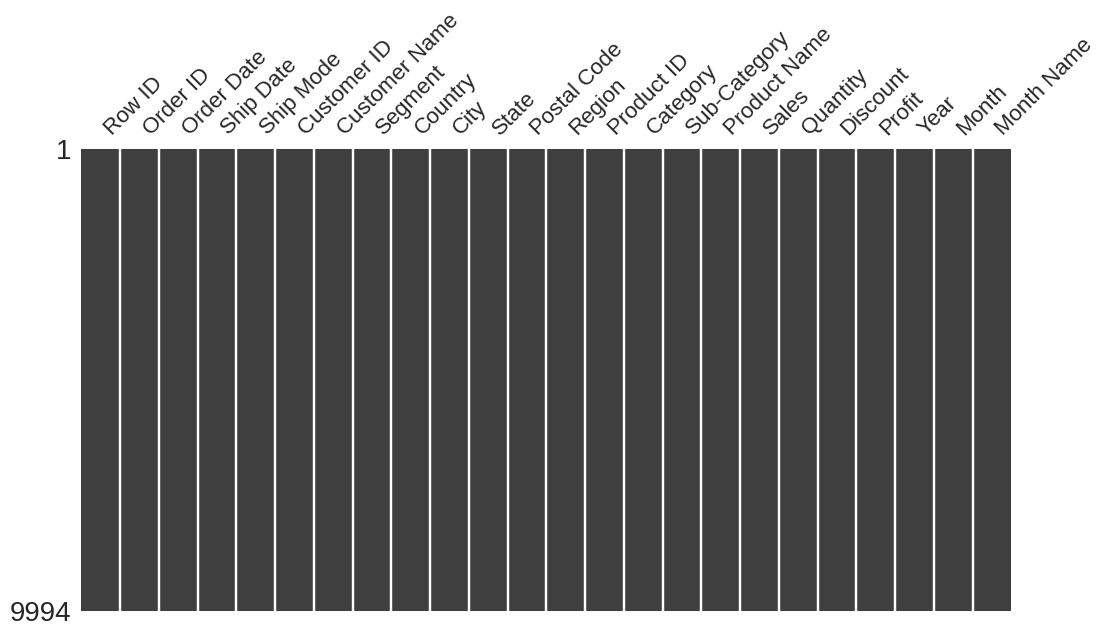

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
msno.matrix(data, ax=ax)
#plt.show()

##**Analisis, Visualizaciones y StoryTelling**

In [ ]:
sales = go.Box(x=data['Sales'],name='Sales ')
Quantity = go.Box(x=data['Quantity'],name='Quantity ')
Profit = go.Box(x=data['Profit'],name='Profit ')
Discount = go.Box(x=data['Discount'],name='Discount ')

fig = make_subplots(rows=2, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Quantity, row = 1, col = 2)
fig.append_trace(Profit, row = 2, col = 1)
fig.append_trace(Discount, row = 2, col = 2)
fig.update_layout(height=600, width=1100, title_text = 'Distribución de los datos numericos', title_font_size = 24, title_x=0.45)
fig.show()

Podemos apreciar que tenemos bastantes outliers en nuestra variable objetivo `Sales` y en `Profit` estos los estaremos reduciendo mas adelante.

In [ ]:
ship_mode = go.Histogram(x=data["Ship Mode"],name="Ship Mode")
segment = go.Histogram(x=data["Segment"],name="Segment")
Region = go.Histogram(x=data["Region"],name="Region")
category = go.Histogram(x=data["Category"],name="Category")

fig = make_subplots(rows=2, cols=2)
fig.append_trace(ship_mode, row = 1, col = 1)
fig.append_trace(segment, row = 1, col = 2)
fig.append_trace(Region, row = 2, col = 1)
fig.append_trace(category, row = 2, col = 2)
fig.update_layout(height=600, width=1100,title_text = 'Numero de ocurrencias en los datos Categoricos', title_font_size = 24, title_x=0.45)
fig.show()

*   **Categorias con mayores ocurrencias.**
    *   Ship Mode: `Standar Class`
    *   Segment: `Consumer`
    *   Region: `West` seguida muy de cerca por `East`
    *   Category: `Office Supplies`


*   **Categorias con menores ocurrencias.**
    *   Ship Mode: `Same Day`
    *   Segment: `Home Office`
    *   Region: `South`
    *   Category: `Technology`

In [ ]:
yearSales = data.groupby('Year')[['Sales','Profit']].sum().reset_index()
fig = px.line(yearSales, x='Year', y=['Sales', 'Profit'], title='Distribución de Ventas/Ganancias por Año')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Pregunta 1. ¿Cómo han cambiado las ventas con el tiempo?

Respuesta, para los datos que estamos analizando podemos notar que a traves de los años las ventas han aumentado desde su inicio en el 2014, por lo que podemos suponer que su tendencia seguira en alza para los proximos años (Despues del 2017).

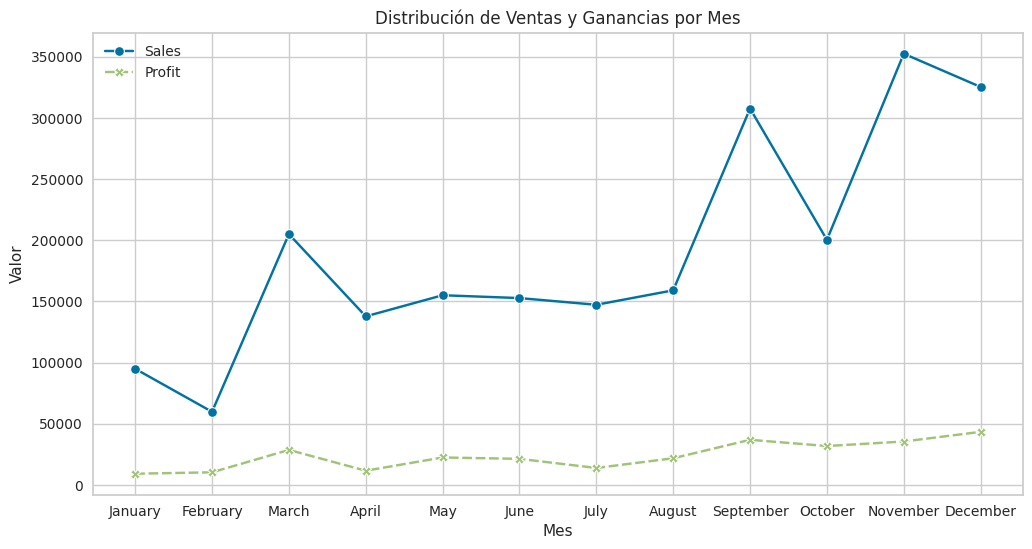

In [ ]:
monthSales = data[["Sales","Profit","Month Name"]].groupby(by="Month Name").sum()
ordenar = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #Ordenar por Nombre del mes
monthSalesOrd = monthSales.reindex(ordenar, axis=0)
plt.figure(figsize=(12,6))
plt.title("Distribución de Ventas y Ganancias por Mes")
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
a = sns.lineplot(data=monthSalesOrd, markers=True, legend=True)
a.set_xlabel("Mes")
a.set_ylabel("Valor")
plt.show()

Para complementar la respuesta de la pregunta 1, en esta grafica podemos notar que los mejores meses de venta son `Noviembre` y `Diciembre`, esto se debe quizas a que es temporada decembrina, despues de esto podemos notar la baja los primeros meses `Enero` y `Febrero`.

In [ ]:
meanSalesYear = data.groupby('Year')[['Sales']].mean().reset_index()
fig = px.line(meanSalesYear, x='Year', y=['Sales'], title='Media de las Ventas por Año')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Por el grafico podemos notar que la media de las ventas mas alta fue en el año 2014, luego en 2016 intento repuntar pero aun asi no logro superar el maximo historico, en 2017 cae pero hay que considerar que no tenemos los datos completos de este año 2017.

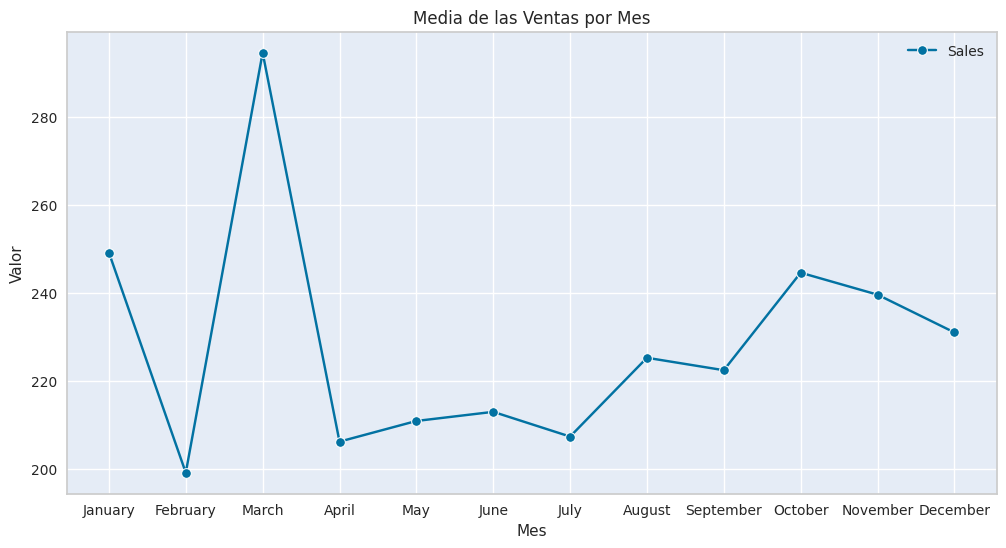

In [ ]:
meanSalesMonth = data.groupby('Month Name')[['Sales']].mean()
meanSalesMonth = meanSalesMonth.reindex(ordenar, axis=0)
plt.figure(figsize=(12,6))
a = sns.lineplot(data=meanSalesMonth, markers=True, legend=True)
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
a.set_xlabel("Mes")
a.set_ylabel("Valor")
a.set_title("Media de las Ventas por Mes")
plt.show()

Podemos notar que el mes con la media mas alta es en marzo. Despues de ahi su tendencia es al alza pero aun asi no supera su maximo.

In [ ]:
medianSalesYear = data.groupby('Year')[['Sales']].median().reset_index()
fig = px.line(medianSalesYear, x='Year', y=['Sales'], title='Mediana de las Ventas por Año')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

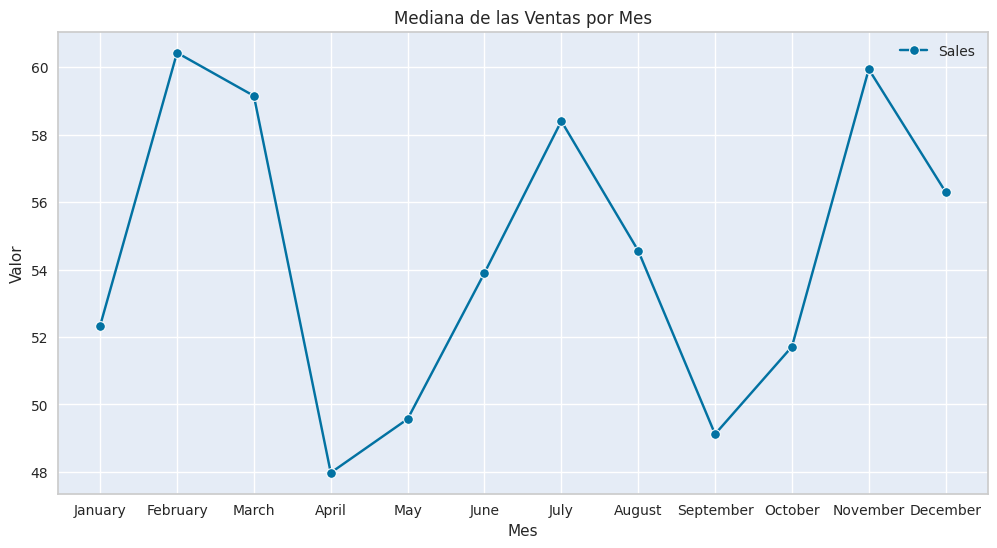

In [ ]:
medianSalesMonth = data.groupby('Month Name')[['Sales']].median()
medianSalesMonth = medianSalesMonth.reindex(ordenar, axis=0)
plt.figure(figsize=(12,6))
a = sns.lineplot(data=medianSalesMonth, markers=True, legend=True)
a.set_xlabel("Mes")
a.set_ylabel("Valor")
a.set_title("Mediana de las Ventas por Mes")
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.show()

La mediana de las ventas por mes está entre 50 y 60.

In [ ]:
salesRegion = data.groupby('Region')['Sales'].sum().reset_index()
fig = px.pie(salesRegion, values='Sales', names='Region', title='Distribución de Ventas por Region', hole=0.4)
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

Pregunta 2. ¿Qué regiones están obteniendo buenos resultados y cuáles necesitan mejorar en términos de ventas?

Respuesta, en el grafico podemos notar que la region que mejores resultados es la region `West` con un 31.6% del total, esto puede deberse a que es una region prospera y con alto poder adquisitivo. Le sigue la region `East` con un 29.5% que no se queda atras por ser la region mas grande y poblada de EEUU, por lo que es probable que tenga un mayor mercado de ventas. Y por ultimo las regiones que necesitan mejorar en terminos de ventas son region `Central` y `South` que en teoria son regiones mas pequeñas y menos pobladas.

In [ ]:
profitRegion = data.groupby('Region')['Profit'].sum().reset_index()
fig = px.pie(profitRegion, values='Profit', names='Region', title='Distribución de Ganancias por Región', hole=0.4)
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

En cuanto a las ganancias, las regiones mantienen el mismo orden.

In [ ]:
salesProfitStates = data.groupby('State')[['Profit', 'Sales']].sum().reset_index()
fig = px.bar(salesProfitStates, x='State', y=['Profit', 'Sales'], title='Profit and Sales by State', barmode='group')
fig.update_layout(xaxis_title='States', yaxis_title='Value', title_x=0.45, height=600, width=1100, title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Para complementar la respuesta de la pregunta 2 podemos confirmar la hipotesis, ya que las mayores ventas y ganancias estan en los estados de `New York` y  `California`. Estados mas prosperos en el pais.

In [ ]:
salesCity = data.groupby('City')[['Sales']].sum().reset_index()
salesCity = salesCity.sort_values(by='Sales', ascending=False)
top15 = salesCity.head(15)
fig = px.bar(top15, x=['Sales'], y='City', orientation='h',color='City')
fig.update_layout(title="Top 15 Distribución de Ventas por Ciudad", title_x=0.45, width=1100, title_font=dict(size=24, family="Arial", color="black"))
fig.update_traces(marker_color=px.colors.qualitative.Pastel)
fig.show()

En ese grafico de igual manera podemos confirmar que las mayores ventas estan en los estados de `New York City` y `Los Angeles` como lo habiamos confirmado en las visualizaciones anteriores. Como ciudades que deben mejorar en sus ventas estan las ciudades de `Lafayette`, `Columbia`, `Newark` entre otras que pertenecen a la region `Central` y `South` del pais.

In [ ]:
salesProfitSegment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=salesProfitSegment['Segment'], y=salesProfitSegment['Sales'], name='Sales'))
fig.add_trace(go.Bar(x=salesProfitSegment['Segment'], y=salesProfitSegment['Profit'], name='Profit'))
fig.update_layout(height=600, width=1100, title='Ventas y Ganancias por Segmento de Cliente', xaxis_title='Segment', yaxis_title='Monto', title_x=0.5, title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Pregunta 3. ¿Qué segmentos de clientes son más propensos a comprar en cada región?

Respuesta, como se puede apreciar en general los clientes mas propensos a comprar son los `Consumer` por ende la mayor cantidad de ganancias se genera por las compras de este segmento de clientes.

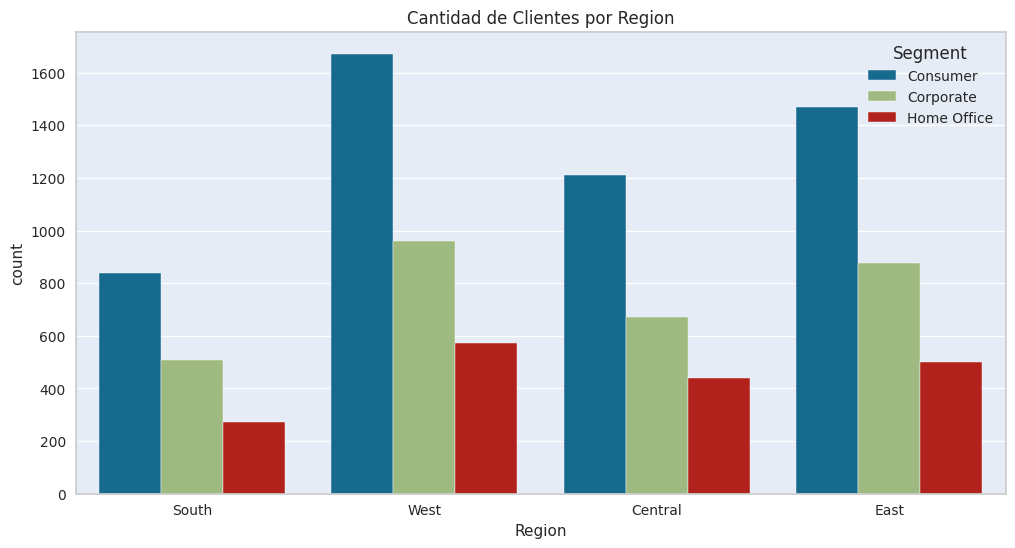

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data, x='Region', hue='Segment')
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.title('Cantidad de Clientes por Region')
plt.show()

Como notamos en el grafico anterior que los clientes mas propensos a comprar son los `Consumer`, pero analizando este grafico podemos confirmar que en todas las regiones la mayor cantidad de clientes son `Consumer`, por lo que se le recomendaria a la organizacion hacer el esfuerzo de captar mas clientes como `Corporate` ya que quizas el monto de las ventas que se le realicen a estas sean mucho mayores, mejorando asi los margenes.

In [ ]:
categorySalesProfit = data.groupby('Category')[['Profit','Sales']].sum().reset_index()
fig = px.bar(categorySalesProfit, x='Category', y=['Profit','Sales'], title='Ventas y Ganancias por Categoria', barmode='group')
fig .update_layout(title_x=0.45,height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Pregunta 4. ¿Qué categoría de productos genera las mayores ingresos y ganancias?

Respuesta, como pudimos ver en la distribucion de datos de la columna categoria (mas arriba), la categoria con mayor cantidad de ventas es la de `Office Supplies` y esto se debe a que tiene mayor cantidad de productos. A pesar de que la categoria `Technology` es la que tiene menos productos es la que mayores ingresos y ganancias genera, podria ser porque los articulos electronicos son mucho mas costosos y comerciales.

In [ ]:
subCategorySalesProfit = data.groupby('Sub-Category')[['Profit','Sales']].sum().reset_index()
fig = px.bar(subCategorySalesProfit, x='Sub-Category', y=['Profit', 'Sales'], title='Ventas y Ganancias por Sub-Categoria', barmode='group')
fig .update_layout(title_x=0.45, height=600, width=1100,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Como podemos notar en este grafico y como se comento en el grafico anterior los productos que mas ingresos generan en la categoria technology son los `Phones`, `Machines` y `Copies` estos por ser mas costosos, en cambio el unico producto que deja mayores ingresos en la categoria de Office Supplies es `Binders`. Ojo que el segundo producto mas rentable son las `Chairs` pero esta pertenece a la categoria Furniture.

In [ ]:
scatter_plot = px.scatter(data, x='Sub-Category', y='Sales', title='Distribución de Productos por Sub-Categoria', color='Category',)
scatter_plot.update_layout(title_font_family="Arial", title_font_size=24, title_font_color="black", title_x=0.5, height=600, width=1100)
scatter_plot.show()

En este grafico puedo confirmar que productos pertenecen a que Categoria.

**Conclusión**

En base al proposito inicial de esta investigacion y despues de haber analizado y visualizado la distribucion de los datos, despues de haber respondido las preguntas e hipotesis planteadas. Podemos concluir lo siguiente:

Para poder minimizar las perdidas, la tienda deberia de dejar de vender a ciertos estados donde se estan teniendo perdidas, como lo vimos en el grafico de `Ventas / Ganancias por Estado` (Texas, Ohio, Pensylvania o Colorado son los estados con mas perdidas). Tambien se podrian aplicar distintas tecnicas de marketing para tratar de hacer mas rentable la operacion en estos estados.

Dejar de vender productos no rentables o mejorar su precio de venta, aplicar mas descuentos en estos (Tables con mayor perdida de la categoria Furniture).

Por lo tanto las pérdidas se pueden atribuir a los tipos de artículos que se venden a los clientes en estos estados o a que los costos de envío a ciertas áreas son mas costosos y por eso se están reduciendo sus ganancias.

## **Analisis Univariado**

In [ ]:
yearSales = data.groupby('Year')['Sales',].sum().reset_index()
fig = px.bar(yearSales, x='Year', y=['Sales'], title='Distribución de Ventas Año')
fig .update_layout(title_x=0.45,height=400, width=800,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

In [ ]:
fig = px.bar(meanSalesYear, x='Year', y='Sales', title='Media de las Ventas por Año')
fig.update_layout(title_x=0.45, height=400, width=800, title_font=dict(size=24, family="Arial", color="black"))
fig.show()

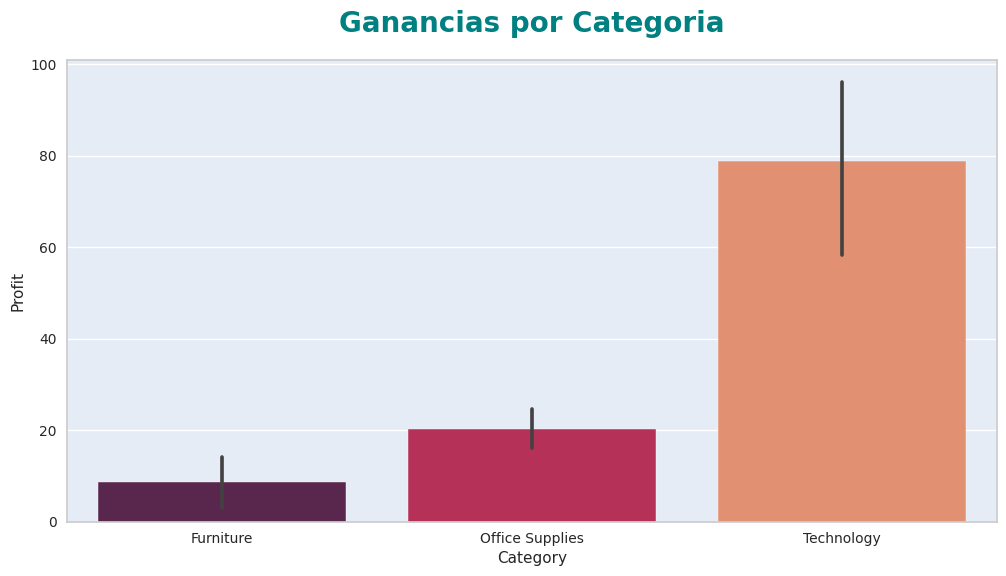

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Category',y='Profit',data=data,palette='rocket')
plt.title('Ganancias por Categoria',pad=20,fontsize=20,fontweight='bold',color='teal')
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.show()

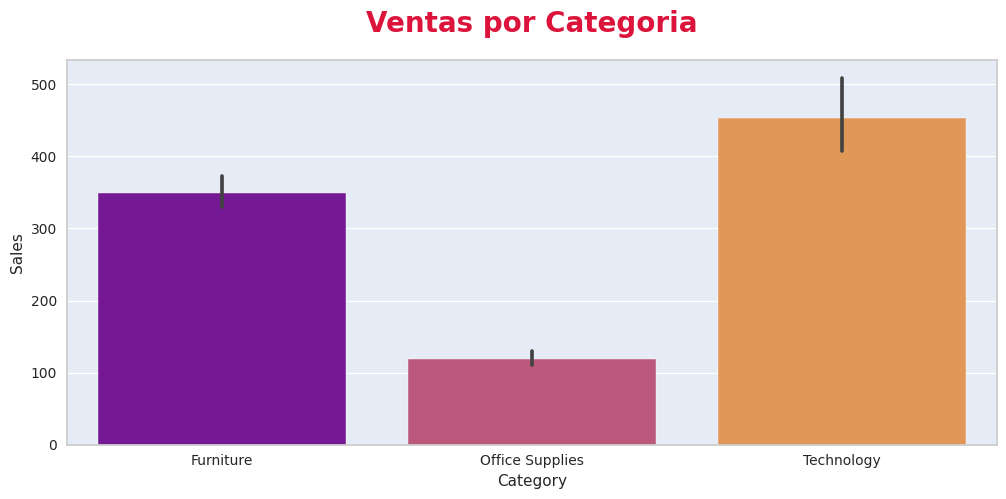

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Category',y='Sales',data=data,palette='plasma')
plt.title('Ventas por Categoria',pad=20,fontsize=20,fontweight='bold',color='crimson')
sns.set_style("whitegrid", {"axes.facecolor": "#E5ECF6", "grid.color": "white"})
plt.show()

##**Analisis Bivariado**

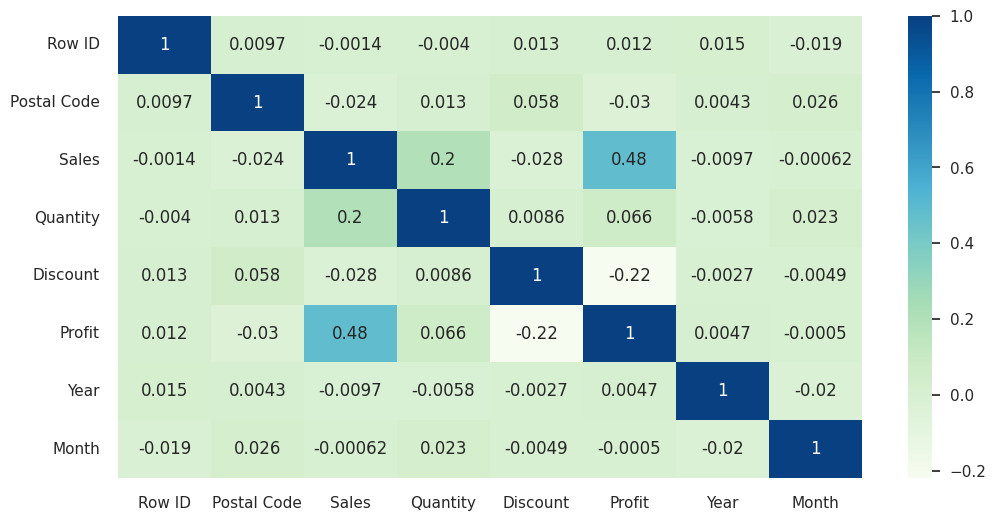

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = data.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'GnBu')

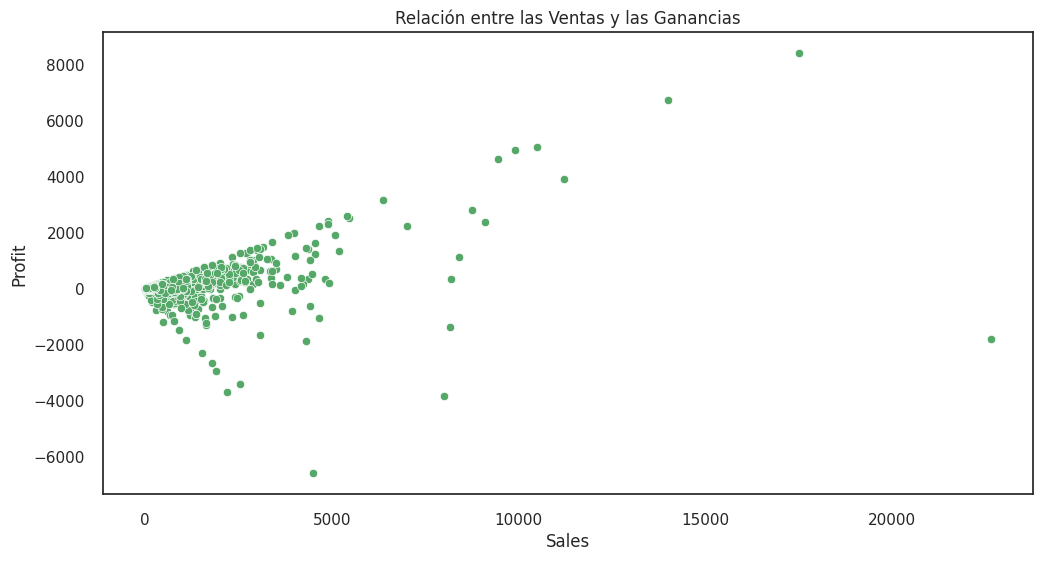

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data, x='Sales', y='Profit', color='g')
plt.title('Relación entre las Ventas y las Ganancias')
plt.show()

 Existe una relación positiva y fuerte entre las ventas y las ganancias de la tienda. Esto significa que la tienda puede aumentar sus ganancias aumentando sus ventas.

#⚡**Entrenando un Algoritmo de Machine Learning**

##✅**Encoding**

In [ ]:
data1 = data.copy() #Copio dataset original para una segunda ronda de entrenamiento con más variables.

In [ ]:
#Convertimos valores categoricos a numericos
le = LabelEncoder()
for i in data.columns:
    if(data.dtypes[i] == 'object'):
        data[i] = le.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   int64  
 2   Order Date     9994 non-null   int64  
 3   Ship Date      9994 non-null   int64  
 4   Ship Mode      9994 non-null   int64  
 5   Customer ID    9994 non-null   int64  
 6   Customer Name  9994 non-null   int64  
 7   Segment        9994 non-null   int64  
 8   Country        9994 non-null   int64  
 9   City           9994 non-null   int64  
 10  State          9994 non-null   int64  
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   int64  
 13  Product ID     9994 non-null   int64  
 14  Category       9994 non-null   int64  
 15  Sub-Category   9994 non-null   int64  
 16  Product Name   9994 non-null   int64  
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
data.drop(['Row ID', 'Order ID','Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'Postal Code',
           'Region', 'Product ID', 'Product Name'], axis=1, inplace=True)
data.columns

Index(['Segment', 'City', 'State', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
sales = go.Box(x=data['Sales'],name='Sales ')
Profit = go.Box(x=data['Profit'],name='Profit')
fig = make_subplots(rows=1, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Profit, row = 1, col = 2)
fig.update_layout(height=400, width=1100, title_text = 'Representación de los Outliers', title_font_size = 24, title_x=0.45)
fig.show()

Trataremos los outliers de `Sales` y `Profit`

In [ ]:
print("Antiguos: ", data.shape[0])
data.drop(index= data[(data['Sales'] > 3000)].index, inplace=True)
data.drop(index= data[(data['Profit'] > 1000) | (data['Profit'] < -500)].index, inplace=True)
print("Nuevos: ", data.shape[0])

Antiguos:  9994
Nuevos:  9882


In [ ]:
sales = go.Box(x=data['Sales'],name='Sales ')
Profit = go.Box(x=data['Profit'],name='Profit')
fig = make_subplots(rows=1, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Profit, row = 1, col = 2)
fig.update_layout(height=400, width=1100, title_text = 'Representación de los Outliers', title_font_size = 24, title_x=0.45)
fig.show()

Ahora el número de Outliers se ha reducido y podemos comenzar a modelar.

In [ ]:
data.head()

,Segment,City,State,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,194,15,0,4,261.9600,2,0.00,41.9136
1,0,194,15,0,5,731.9400,3,0.00,219.5820
2,1,266,3,1,10,14.6200,2,0.00,6.8714
3,0,153,8,0,16,957.5775,5,0.45,-383.0310
4,0,153,8,1,14,22.3680,2,0.20,2.5164


##✅**Feature Engineering**

In [ ]:
#utilizamos el metodo de Standard Scaler
sc = StandardScaler()
x = data.drop(['Sales'] , axis = 1).values
y =data['Sales'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

##✅**Entrenando Algoritmos**

Siendo `Sales` mi variable objetivo, que es un valor continuo, elegire un algoritmo de regresión.

Primero probaremos con un **Algoritmo de Regresion Lineal**, luego con **CatBoostRegressor** por ultimo **LGBMRegressor** y obtendremos:


✔ `MSE (Mean Squared Error):` Error Cuadrático Medio.

✔ `RMSE (Root Mean Squared Error):` Raíz del Error Cuadrático Medio.

✔ `Reg_score (R-squared):` Coeficiente de Determinación.

✔ `MAPE (Mean Absolute Percentage Error):` Error Absoluto Medio Porcentual.

✔ `MAE (Mean Absolute Error):` Error Absoluto Medio.

☝**Regresion Lineal**

In [ ]:
lr = LinearRegression()                                       # Inicializar el modelo de Regresión Lineal
lr.fit(x_train, y_train)                                      # Entrenar el modelo con los datos de entrenamiento

LinearRegression()

Regresion Lineal
0.3850246213917936
0.4800552905683607
MSE: 64534.03300139667
RMSE: 254.03549555405965
Reg_score: 0.4800552905683607
MAPE: 5.992007312132307
MAE: 158.29918230165956


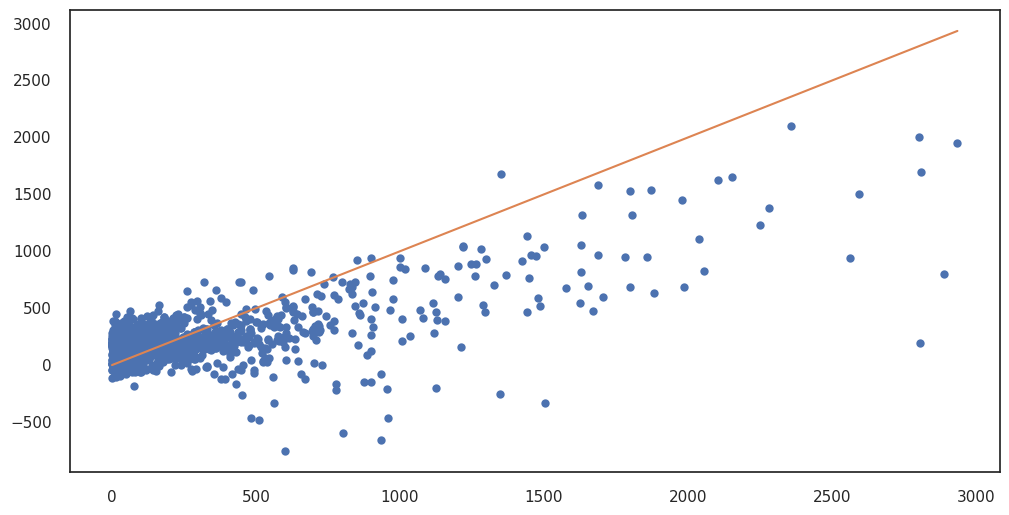

In [ ]:
print("Regresion Lineal")
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
y_pred = lr.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAE

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

✅ **Interpretación:**

El `MSE` y `RMSE` son elevados, lo que indica que las predicciones del modelo tienen un error relativamente alto.

El valor de `Reg_score` es bajo, lo que indica que la regresión lineal no explica una parte significativa de la varianza en la variable objetivo.

El `MAPE` es moderado, lo que sugiere que hay una desviacion promedio del 5.99% de los valores reales.

El `MAE` indica que el error promedio en las predicciones es de 158.2398 unidades.

✅ **Conclusiones:**

El modelo de regresión lineal ajustado no parece ser un buen predictor de la variable objetivo.

Hay un error considerable en las predicciones del modelo.

Se necesitan más datos o un modelo diferente para obtener resultados más precisos.

☝ **Cat Boost Regressor**

In [ ]:
cat= CatBoostRegressor()                                      # Inicializar el modelo CatBoostRegressor
cat.fit(x_train, y_train)                                     # Entrenar el modelo con los datos de entrenamiento

Learning rate set to 0.056761
0:	learn: 328.2435348	total: 10.8ms	remaining: 10.8s
1:	learn: 317.3802366	total: 14.5ms	remaining: 7.25s
2:	learn: 307.8784557	total: 18.2ms	remaining: 6.04s
3:	learn: 298.7092457	total: 21.5ms	remaining: 5.34s
4:	learn: 290.2035154	total: 24.8ms	remaining: 4.93s
5:	learn: 281.8455358	total: 29.9ms	remaining: 4.95s
6:	learn: 274.1524103	total: 35.6ms	remaining: 5.05s
7:	learn: 266.4944449	total: 41.3ms	remaining: 5.12s
8:	learn: 259.9228458	total: 46.7ms	remaining: 5.14s
9:	learn: 253.1226668	total: 57.9ms	remaining: 5.74s
10:	learn: 247.0682134	total: 64.6ms	remaining: 5.81s
11:	learn: 241.1893056	total: 73.2ms	remaining: 6.02s
12:	learn: 235.4526107	total: 76.8ms	remaining: 5.83s
13:	learn: 230.2302749	total: 83.6ms	remaining: 5.89s
14:	learn: 225.2045923	total: 89.3ms	remaining: 5.86s
15:	learn: 220.8638654	total: 95.1ms	remaining: 5.85s
16:	learn: 216.8668390	total: 100ms	remaining: 5.81s
17:	learn: 212.5396117	total: 106ms	remaining: 5.77s
18:	learn:

CAT
0.9397944900305018
0.8580746383588838
MSE: 17615.365260461702
RMSE: 132.72288898476293
Reg_score: 0.8580746383588838
MAPE: 0.8779511403068303
MAE: 57.95264388243018


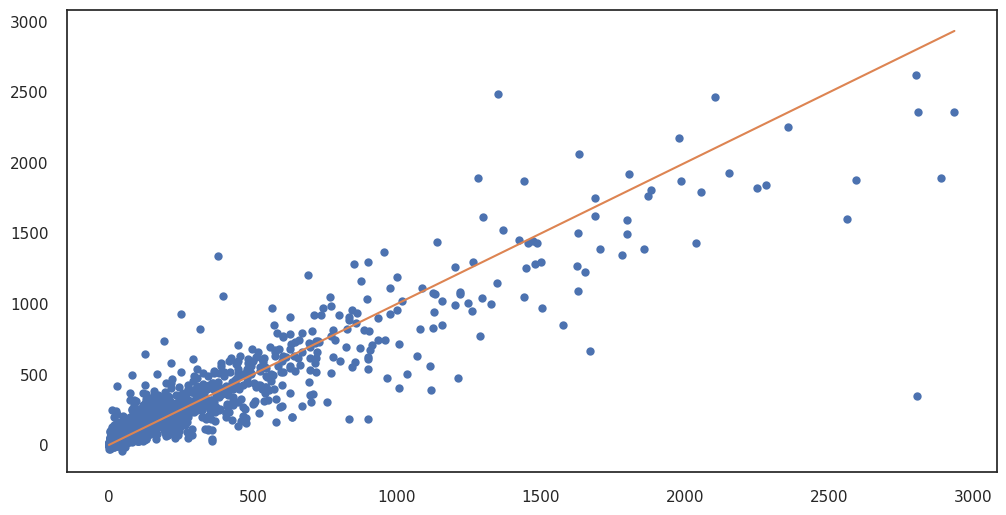

In [ ]:
print('CAT')
print(cat.score(x_train,y_train))
print(cat.score(x_test, y_test))
y_pred = cat.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAEr

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

✅ **Interpretación:**

El `MSE` y `RMSE` son inferiores al modelo de `Regresión Lineal`.

El valor de `Reg_score` es alto, lo que indica que la regresión `CAT` explica una parte significativa de la varianza en la variable objetivo.

El `MAPE` es moderado, lo que sugiere que hay una desviacion promedio del 0.9% de los valores reales.

El `MAE` indica que el error promedio en las predicciones es de 57.817 unidades.

✅ **Conclusiones:**

El modelo de regresión `CAT` ajustado parece ser el `MEJOR` predictor de la variable objetivo.

Las predicciones del modelo tienen un error relativamente bajo.

No se necesitan más datos o un modelo diferente para obtener resultados más precisos.

☝ **LGMR Regressor**

In [ ]:
gbm= LGBMRegressor()                                          # Inicializar el modelo LGBMRegressor
gbm.fit(x_train, y_train)                                     # Entrenar el modelo con los datos de entrenamiento

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 7905, number of used features: 8
[LightGBM] [Info] Start training from score 188.941351


LGBMRegressor()

LightGBM
0.9153863414002865
0.850542064683355
MSE: 18550.28651140277
RMSE: 136.19943653115004
Reg_score: 0.850542064683355
MAPE: 1.372514362568931
MAE: 63.00809901613175


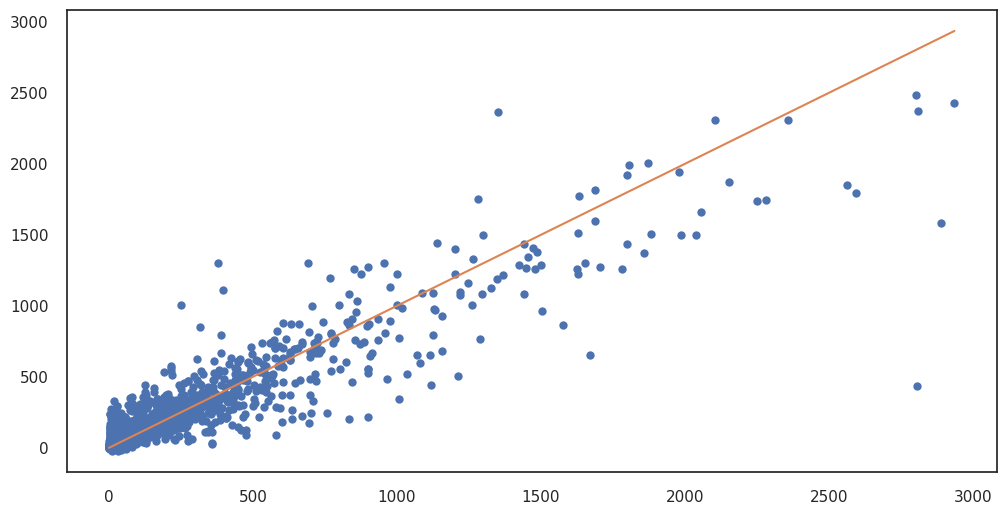

In [ ]:
print('LightGBM')
print(gbm.score(x_train,y_train))
print(gbm.score(x_test, y_test))
y_pred = gbm.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAE

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

✅ **Interpretación:**

El `MSE` y `RMSE` son inferiores al modelo de `Regresión Lineal` y mayores al modelo `CAT`.

El valor de `Reg_score` es alto, lo que indica que la regresión `LightGBM` explica una parte significativa de la varianza en la variable objetivo.

El `MAPE` es bajo, lo que sugiere que hay una desviacion promedio del 1.22% de los valores reales.

El `MAE` indica que el error promedio en las predicciones es de 63.761 unidades.

✅ **Conclusiones:**

El modelo de regresión LightGBM ajustado parece ser un buen predictor de la variable objetivo.

Las predicciones del modelo tienen un error relativamente bajo.

No se necesitan más datos o un modelo diferente para obtener resultados más precisos.

#✌**Evaluando Modelos de Machine Learning**

✅ Para esta entrega donde debemos evaluar modelos de ML estare usando una libreria de Python llamada `PyCaret`, en general, PyCaret es una excelente herramienta, la cual nos permite realizar tareas de aprendizaje automático de manera rápida y sencilla, especialmente para proyectos en los que la velocidad y la eficiencia son prioritarias sobre la máxima personalización y control.

In [ ]:
data1.head() #copia del dataset original.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Month Name
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October


In [ ]:
data1.shape

(9994, 24)

En la siguiente instrucción por medio de la libreria `PyCaret` preparara los datos para el modelado de aprendizaje automático, incluida la selección de características, la normalización de datos y la especificación de la variable objetivo (`Sales`).

In [ ]:
df = setup(data = data1,  target = 'Sales', feature_selection=True, normalize=True, session_id = 123)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2578
[LightGBM] [Info] Number of data points in the train set: 6995, number of used features: 63
[LightGBM] [Info] Start training from score 233.643352


,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(9994, 24)"
4,Transformed data shape,"(9994, 5)"
5,Transformed train set shape,"(6995, 5)"
6,Transformed test set shape,"(2999, 5)"
7,Numeric features,7
8,Date features,2
9,Categorical features,14


In [ ]:
mejorModelo = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,107.1810,187545.4100,386.3979,0.6172,0.8383,1.4153,1.5760
knn,K Neighbors Regressor,108.2040,173714.5457,372.4836,0.6417,0.7838,1.1913,0.8200
et,Extra Trees Regressor,111.1273,221164.5698,431.7735,0.5217,0.7132,1.0096,1.8150
xgboost,Extreme Gradient Boosting,112.8013,249872.5289,453.9516,0.4762,0.7439,1.0741,0.9290
rf,Random Forest Regressor,113.3790,227306.1237,437.1174,0.5129,0.7176,1.0033,3.5390
lightgbm,Light Gradient Boosting Machine,114.9505,229049.1038,435.0967,0.5200,0.7774,1.2216,1.2290
catboost,CatBoost Regressor,116.1543,258138.9159,465.7272,0.4512,0.7889,1.1912,3.6230
dt,Decision Tree Regressor,120.9523,233844.2327,444.0149,0.4864,0.7890,1.0588,0.7190
par,Passive Aggressive Regressor,130.9845,214453.8839,417.9497,0.5265,1.0621,2.2071,0.8300
huber,Huber Regressor,132.9315,211084.2739,415.3107,0.5299,1.0879,2.3703,0.6580


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Aca podemos apreciar y comparar el rendimiento de los diferentes modelos de aprendizaje automático.

In [ ]:
mejorModelo

GradientBoostingRegressor(random_state=123)

Segun la métrica de error medio absoluto (MAE) el que tuvo mejor rendimiento fue el modelo `GBR`

In [ ]:
mejorModelo = create_model(mejorModelo)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,102.5195,85750.2980,292.8315,0.5906,0.9021,1.6723
1,127.8869,235432.4355,485.2138,0.5752,0.8889,1.5263
2,72.3647,32410.4760,180.0291,0.8449,0.7298,1.2756
3,139.2231,790573.7737,889.1422,0.1501,0.8761,1.4066
4,116.1753,220464.2090,469.5362,0.6396,0.8557,1.5111
5,84.3011,78356.1761,279.9217,0.7658,0.7099,1.0219
6,132.8129,205602.7116,453.4344,0.4411,0.8973,1.5091
7,95.2523,48179.8106,219.4990,0.6986,0.8960,1.7122
8,104.5416,108351.5477,329.1680,0.6273,0.8495,1.3945


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Creamos una instancia del mejor modelo seleccionado anteriormente.

In [ ]:
tuned_model = tune_model(mejorModelo)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,113.0682,95962.9097,309.7788,0.5418,0.9017,1.6228
1,140.3683,339824.9127,582.9450,0.3868,0.8712,1.2657
2,71.5219,38585.0850,196.4309,0.8153,0.7071,1.1508
3,142.5189,817927.2603,904.3933,0.1207,0.8515,1.2488
4,111.3286,157828.5146,397.2764,0.7420,0.8018,1.2455
5,87.9556,185189.1047,430.3360,0.4464,0.6429,0.8216
6,141.1448,219223.6995,468.2133,0.4040,0.8861,1.3760
7,99.7242,51994.7376,228.0235,0.6748,0.9086,1.5725
8,108.3545,120913.5806,347.7263,0.5841,0.8079,1.2078


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Buscamos la combinación óptima de hiperparámetros para mejorar el rendimiento del modelo. Pero al parecer no lo mejoro. (Seguiremos intentando)

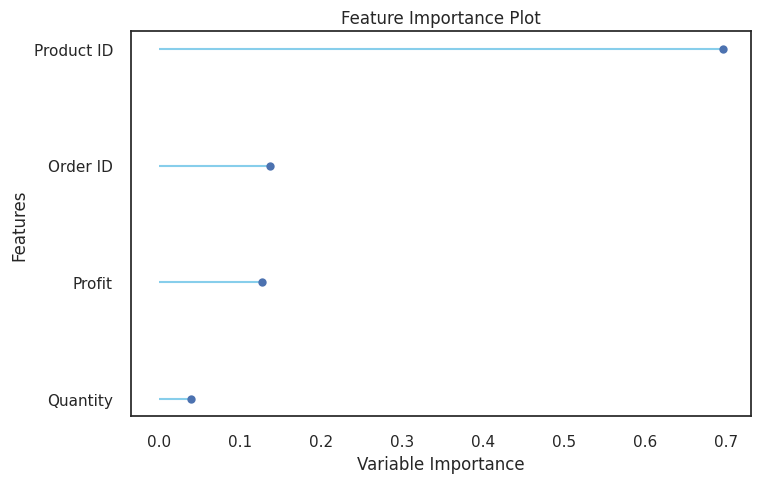

In [ ]:
plot_model(estimator = tuned_model, plot = 'feature')

Esta visualización nos ayuda a entender qué características del conjunto de datos son más importantes para el modelo ajustado y cómo contribuyen a las predicciones del modelo.

Podemos utilizar mas adelante esta información para realizar una selección de características más efectiva o para entender mejor el funcionamiento interno del modelo.

#⏳**Ingenieria de atributos y seleccion de variables**  

Para esta entrega usare el dataset original y utilizaremos tecnicas aprendidas para el tratamiento de los datos.

##✅**Feature Engineering**

In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
data.drop(['Row ID', 'Order ID','Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'City', 'Postal Code',
           'Product ID', 'Product Name'], axis=1, inplace=True)

In [9]:
data.columns

Index(['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
scaler = StandardScaler()
scalecol = ['Sales', 'Quantity', 'Discount', 'Profit']
for i in scalecol:
    data[i] = scaler.fit_transform(data[[i]])

Normalizamos las variables numericas con el fin de estandarizar los datos.

In [11]:
data.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,0.051510,-0.804303,-0.756643,0.056593
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,0.805633,-0.354865,-0.756643,0.815054
2,Second Class,Corporate,California,West,Office Supplies,Labels,-0.345368,-0.804303,-0.756643,-0.093002
3,Standard Class,Consumer,Florida,South,Furniture,Tables,1.167688,0.544012,1.423149,-1.757484
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,-0.332935,-0.804303,0.212153,-0.111593


In [12]:
lablecol = data[['Ship Mode', 'Segment', 'State', 'Region', 'Category','Sub-Category']]
dummi = pd.get_dummies(lablecol,drop_first=True)

Seleccionamos las variables categóricas para convertirlas en variables sinteticas utilizando la función `get_dummies`.

In [13]:
data = pd.concat([data,dummi], axis=1)
data = data.drop(['Ship Mode', 'Segment', 'State', 'Region', 'Category','Sub-Category'], axis=1)
data.head()

,Sales,Quantity,Discount,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,State_Arizona,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0.051510,-0.804303,-0.756643,0.056593,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.805633,-0.354865,-0.756643,0.815054,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.345368,-0.804303,-0.756643,-0.093002,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.167688,0.544012,1.423149,-1.757484,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.332935,-0.804303,0.212153,-0.111593,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Concatenamos el resultado de normalizar el dataset y el resultante despues de ultilizar `get_dummies`

In [14]:
x = data.drop(['Sales'] , axis = 1).values
y =data['Sales'].values

Separamos las variables independientes (X) y la variable dependiente (y)

In [15]:
pca = PCA(n_components=0.95)
x_transformed = pca.fit_transform(x)

Utilizamos PCA para reducir la dimensionalidad de las variables independientes del conjunto de datos.

In [16]:
x_transformed

array([[ 4.75076569e-01, -9.68261217e-01, -1.51846093e-01, ...,
        -7.12251006e-02,  9.38664101e-01, -1.87207561e-01],
       [ 1.03790420e+00, -4.47450214e-01,  2.93645225e-01, ...,
        -1.18267181e-01, -5.13995915e-02, -1.98011643e-02],
       [ 4.92339880e-01, -1.02131458e+00, -4.84440973e-01, ...,
        -3.05904201e-02, -6.34848103e-04, -5.63673278e-02],
       ...,
       [-1.26306440e-01, -7.56847919e-01,  2.23571083e-01, ...,
         2.06626023e-02,  1.58669573e-02, -8.87430754e-03],
       [ 6.32956905e-01, -1.67643401e-01, -7.26409493e-01, ...,
         8.66430880e-03, -5.32354537e-03, -1.54724967e-02],
       [ 6.68301435e-01, -9.94490749e-01, -2.60339635e-01, ...,
        -7.55998754e-02, -8.37585469e-03, -3.15036802e-02]])

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x_transformed , y , test_size=0.20 , random_state=42)

Ahora separamos los datos en los datos de entrenamiento y los datos de prueba.

##✅**Evaluamos en Modelos**

Procedemos a evaluar en los modelos que por lo general hemos venido trabajando ya que son los que mejor rendimiento han dado a lo largo de los desafios.

In [ ]:
lr = LinearRegression()                                       # Inicializar el modelo de Regresión Lineal
lr.fit(x_train, y_train)                                      # Entrenar el modelo con los datos de entrenamiento

LinearRegression()

Regresion Lineal
0.5138285067544134
MSE: 1.6267975823493028
RMSE: 1.2754597533239938
Reg_score: -0.06964939891689736
MAPE: 1.8244443615103563
MAE: 0.3364293033258412


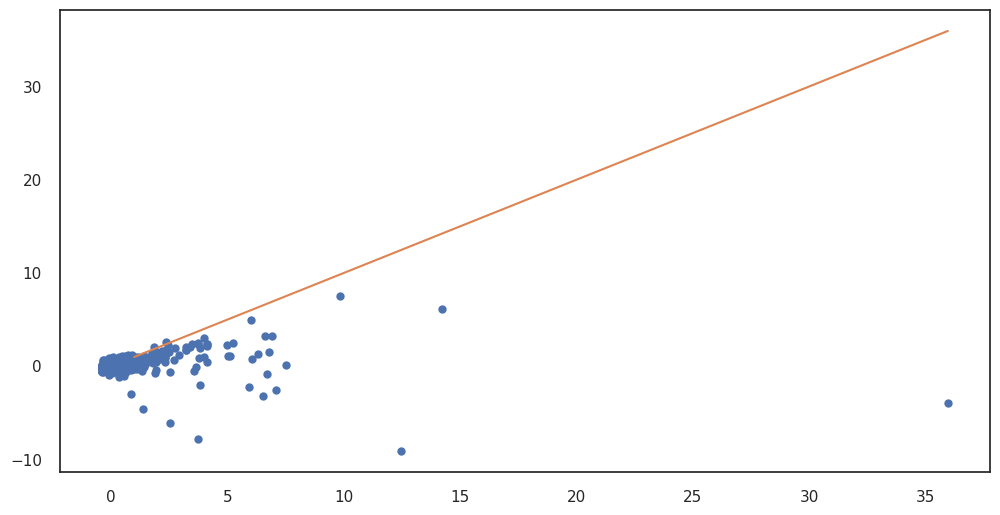

In [ ]:
print("Regresion Lineal")
print(lr.score(x_train, y_train))
#print(lr.score(x_test, y_test))
y_pred = lr.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAE

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

**Resumen**

El modelo tiene un R^2 moderado, lo que indica que explica una parte de la variabilidad en las ventas.

El coeficiente de regresión es bajo, lo que indica una relación débil entre el precio de venta y las ventas.

El MSE, RMSE y MAPE son relativamente altos, lo que indica que el modelo no es muy preciso en la predicción de las ventas.

El MAE es relativamente bajo, lo que indica que el modelo no se equivoca demasiado en la predicción de las ventas.

In [18]:
cat= CatBoostRegressor()                                      # Inicializar el modelo CatBoostRegressor
cat.fit(x_train, y_train)                                     # Entrenar el modelo con los datos de entrenamiento

Learning rate set to 0.056862
0:	learn: 0.9089587	total: 63.7ms	remaining: 1m 3s
1:	learn: 0.8834361	total: 72.7ms	remaining: 36.3s
2:	learn: 0.8616764	total: 81.6ms	remaining: 27.1s
3:	learn: 0.8419315	total: 90.5ms	remaining: 22.5s
4:	learn: 0.8218635	total: 99.1ms	remaining: 19.7s
5:	learn: 0.8000209	total: 108ms	remaining: 17.8s
6:	learn: 0.7810584	total: 118ms	remaining: 16.8s
7:	learn: 0.7636791	total: 127ms	remaining: 15.7s
8:	learn: 0.7488133	total: 135ms	remaining: 14.9s
9:	learn: 0.7333349	total: 144ms	remaining: 14.2s
10:	learn: 0.7192702	total: 152ms	remaining: 13.7s
11:	learn: 0.7048011	total: 160ms	remaining: 13.2s
12:	learn: 0.6897215	total: 169ms	remaining: 12.9s
13:	learn: 0.6769454	total: 178ms	remaining: 12.6s
14:	learn: 0.6649692	total: 187ms	remaining: 12.3s
15:	learn: 0.6524307	total: 201ms	remaining: 12.4s
16:	learn: 0.6422480	total: 210ms	remaining: 12.1s
17:	learn: 0.6314313	total: 221ms	remaining: 12s
18:	learn: 0.6217661	total: 230ms	remaining: 11.9s
19:	lear

CAT
0.9791899017344913
MSE: 0.6693904438880832
RMSE: 0.8181628468025686
Reg_score: 0.5598634435443473
MAPE: 0.8447098007666177
MAE: 0.1608694233093674


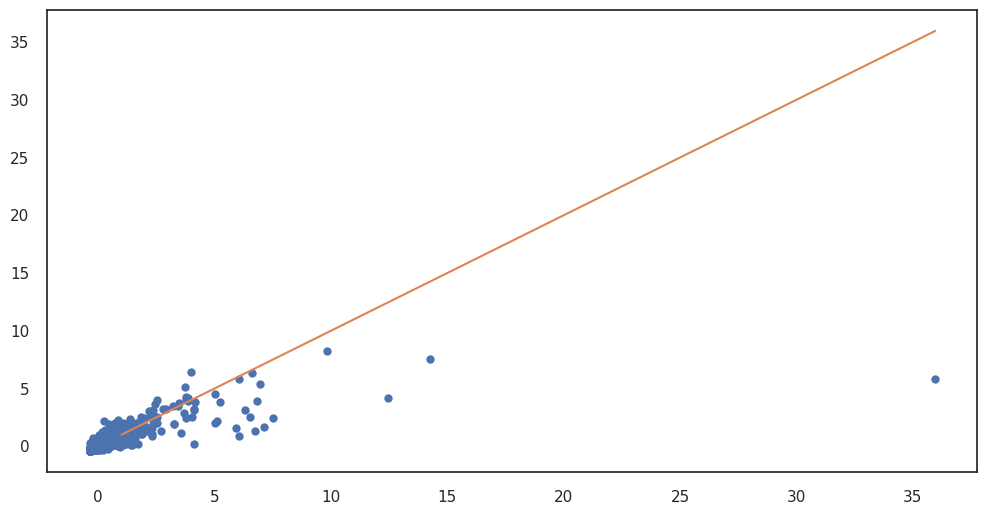

In [ ]:
print('CAT')
print(cat.score(x_train,y_train))
#print(cat.score(x_test, y_test))
y_pred = cat.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAEr

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

**Resumen**

El modelo tiene un R^2 muy alto, lo que indica que explica una gran parte de la variabilidad en las ventas.

El coeficiente de regresión es moderado, lo que indica una relación moderada entre las variables independientes y la variable objetivo.

El MSE, RMSE y MAPE son relativamente bajos, lo que indica que el modelo es preciso en la predicción de las ventas.

El MAE es bajo, lo que indica que el modelo no se equivoca demasiado en la predicción de las ventas.

In [ ]:
gbm= LGBMRegressor()                                          # Inicializar el modelo LGBMRegressor
gbm.fit(x_train, y_train)                                     # Entrenar el modelo con los datos de entrenamiento

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 7995, number of used features: 31
[LightGBM] [Info] Start training from score -0.006771


LGBMRegressor()

LightGBM
0.8600558960006451
MSE: 0.7067119241949098
RMSE: 0.8406615990961582
Reg_score: 0.5353238822553299
MAPE: 0.950061218049259
MAE: 0.1749512661782897


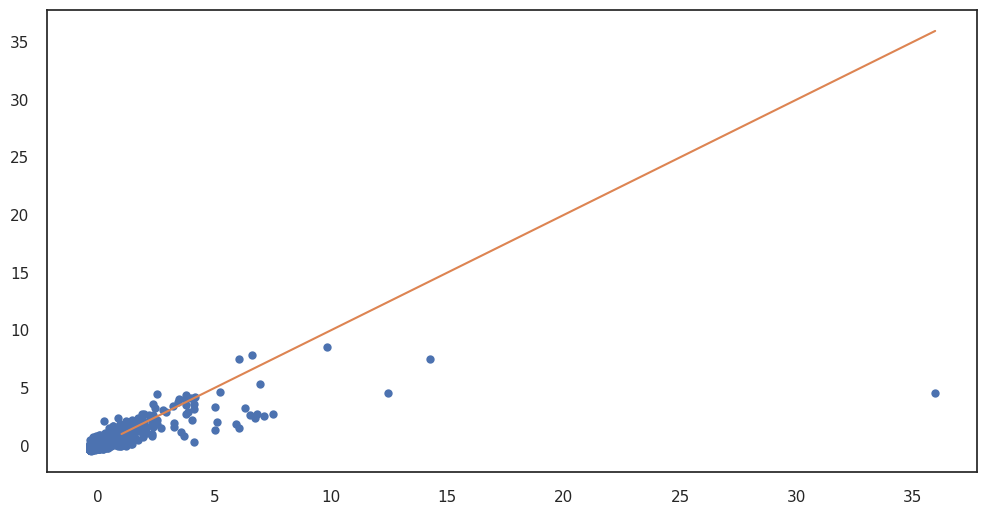

In [ ]:
print('LightGBM')
print(gbm.score(x_train,y_train))
#print(gbm.score(x_test, y_test))
y_pred = gbm.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAE

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

**Resumen**

El modelo tiene un R^2 alto, lo que indica que explica una gran parte de la variabilidad en las ventas.

El coeficiente de regresión es moderado, lo que indica una relación moderada entre las variables independientes y la variable objetivo.

El MSE, RMSE y MAPE son relativamente bajos, lo que indica que el modelo es preciso en la predicción de las ventas.

El MAE es bajo, lo que indica que el modelo no se equivoca demasiado en la predicción de las ventas.

**Conclusion**

Despues de haber observado los resultados, el modelo que mejor se ajusta es el de `CatBoostRegressor`.

**Razones**

Alto R^2: El CatBoostRegressor tiene el R^2 más alto (0.9792) de los tres modelos. Esto significa que el modelo explica una mayor parte de la variabilidad en la variable objetivo (Sales) que los otros dos modelos.

Coeficiente de regresión moderado: El coeficiente de regresión del CatBoostRegressor (0.5599) es moderado, lo que indica que existe una relación moderada entre las variables independientes y la variable objetivo. Esto es importante porque un coeficiente de regresión demasiado alto o demasiado bajo puede indicar que el modelo no es confiable.

Bajos MSE, RMSE y MAPE: El CatBoostRegressor tiene los valores más bajos de MSE (0.6694), RMSE (0.8182) y MAPE (0.8447%) de los tres modelos. Esto significa que el modelo es preciso en la predicción de las ventas.

Bajo MAE: El CatBoostRegressor tiene un MAE bajo (0.1609), lo que indica que el modelo no se equivoca demasiado en la predicción de las ventas.

# ⭐**CrossValidation y mejora de modelos de ML**

Para esta entrega seleccionare el modelo que tuvo mejor rendimiento en la entrega anterior `CatBoostRegressor`

In [18]:
cat= CatBoostRegressor()                                      # Inicializar el modelo CatBoostRegressor
cat.fit(x_train, y_train)                                     # Entrenamos el modelo

Learning rate set to 0.056862
0:	learn: 0.9089587	total: 59.6ms	remaining: 59.6s
1:	learn: 0.8834361	total: 68.4ms	remaining: 34.1s
2:	learn: 0.8616764	total: 77.3ms	remaining: 25.7s
3:	learn: 0.8419315	total: 86.1ms	remaining: 21.4s
4:	learn: 0.8218635	total: 94.7ms	remaining: 18.9s
5:	learn: 0.8000209	total: 103ms	remaining: 17.1s
6:	learn: 0.7810584	total: 112ms	remaining: 15.9s
7:	learn: 0.7636791	total: 121ms	remaining: 15s
8:	learn: 0.7488133	total: 129ms	remaining: 14.2s
9:	learn: 0.7333349	total: 138ms	remaining: 13.6s
10:	learn: 0.7192702	total: 146ms	remaining: 13.1s
11:	learn: 0.7048011	total: 157ms	remaining: 12.9s
12:	learn: 0.6897215	total: 168ms	remaining: 12.8s
13:	learn: 0.6769454	total: 177ms	remaining: 12.5s
14:	learn: 0.6649692	total: 186ms	remaining: 12.2s
15:	learn: 0.6524307	total: 195ms	remaining: 12s
16:	learn: 0.6422480	total: 206ms	remaining: 11.9s
17:	learn: 0.6314313	total: 216ms	remaining: 11.8s
18:	learn: 0.6217661	total: 226ms	remaining: 11.6s
19:	learn:

CAT
0.9791899017344913
MSE: 0.6693904438880832
RMSE: 0.8181628468025686
Reg_score: 0.5598634435443473
MAPE: 0.8447098007666177
MAE: 0.1608694233093674


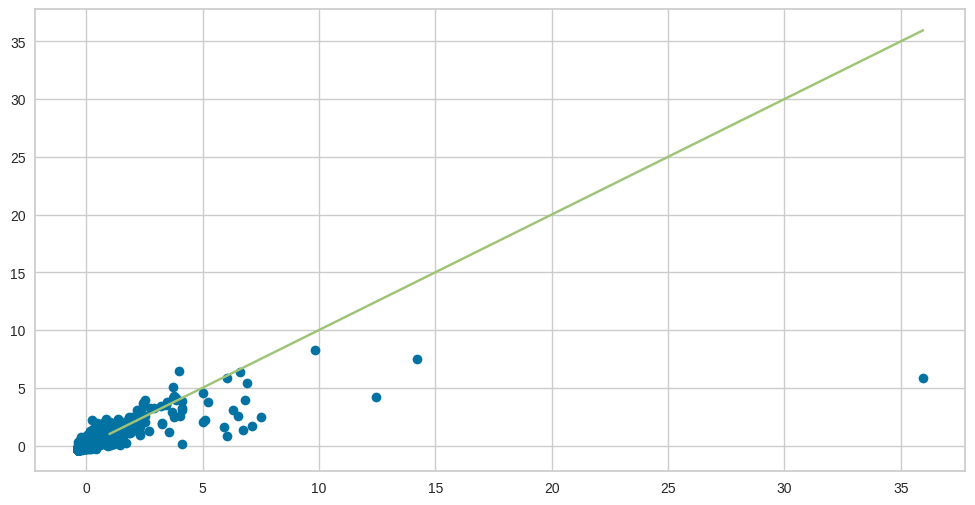

In [19]:
print('CAT')
print(cat.score(x_train,y_train))
y_pred = cat.predict(x_test)

#Metricas de Evaluacion del modelo.

mse = mean_squared_error(y_test , y_pred)                     # MSE
rmse = np.sqrt(mse)                                           # RMSE
reg_score = r2_score(y_test , y_pred)                         # reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        # MAPE
mae = mean_absolute_error(y_test , y_pred)                    # MAEr

print('MSE:', mse)
print('RMSE:', rmse)
print('Reg_score:', reg_score )
print('MAPE:', mape )
print('MAE:', mae)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

Utilizaremos `cross_val_score` que es una función de validación cruzada que evalúa el rendimiento del modelo utilizando validación cruzada k-fold.

In [35]:
cbr = CatBoostRegressor(random_state=42, n_estimators=10, max_depth=4)
scores = cross_val_score(cbr, x_train, y_train, cv=10, verbose=1, scoring='r2') #Utilizamos 10 folds (particiones) en la validación cruzada.

Learning rate set to 0.5
0:	learn: 0.7359674	total: 15.3ms	remaining: 138ms
1:	learn: 0.6258792	total: 27.2ms	remaining: 109ms
2:	learn: 0.5645778	total: 39.6ms	remaining: 92.4ms
3:	learn: 0.5159242	total: 51.4ms	remaining: 77.2ms
4:	learn: 0.4835552	total: 63.5ms	remaining: 63.5ms
5:	learn: 0.4615127	total: 75.4ms	remaining: 50.2ms
6:	learn: 0.4438829	total: 87.1ms	remaining: 37.3ms
7:	learn: 0.4319458	total: 99.1ms	remaining: 24.8ms
8:	learn: 0.4214983	total: 111ms	remaining: 12.3ms
9:	learn: 0.4072074	total: 124ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.7158195	total: 12.8ms	remaining: 115ms
1:	learn: 0.6253426	total: 22.9ms	remaining: 91.7ms
2:	learn: 0.5644474	total: 27.5ms	remaining: 64.1ms
3:	learn: 0.5203546	total: 41ms	remaining: 61.5ms
4:	learn: 0.4919618	total: 45.5ms	remaining: 45.5ms
5:	learn: 0.4781785	total: 51.3ms	remaining: 34.2ms
6:	learn: 0.4554581	total: 55.2ms	remaining: 23.7ms
7:	learn: 0.4455825	total: 61ms	remaining: 15.3ms
8:	learn: 0.4337217	total:

In [40]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std())) #Imprimimos el promedio de los puntajes de R^2 y la desviación estandar.

0.66 de r2 promedio con una desviacion estandar de 0.09


Pregunta: Describir si hay cambios en el performance del modelo y explicar con razones el porqué??

Respuesta:

1. **Cambios en el rendimiento del modelo:** Antes de aplicar la validación cruzada, el modelo tenía un rendimiento aparentemente excelente con un coeficiente de determinación R^2 muy alto de aproximadamente 0.9792. Sin embargo, después de la validación cruzada, el R^2 promedio fue de 0.66 con una desviación estándar de 0.09, lo que sugiere un rendimiento más moderado en la predicción de los datos de entrenamiento.

2. **Explicación de los cambios:**
   - **Sobreajuste inicial:** Es probable que el modelo inicial estuviera sobreajustado a los datos de entrenamiento originales, lo que significa que se adaptaba demasiado a esos datos específicos y no generalizaba bien a nuevos datos.
   
   - **Validación cruzada:** La validación cruzada proporciona una evaluación más robusta del rendimiento del modelo al evaluarlo en múltiples particiones de los datos. Esto reveló que el rendimiento del modelo era menos impresionante de lo que indicaban las métricas originales.

En resumen, los cambios en el rendimiento del modelo sugieren que el modelo `CatBoostRegressor` inicialmente estaba sobreajustado a los datos de entrenamiento originales. La validación cruzada proporcionó una evaluación más realista del rendimiento del modelo, mostrando que su capacidad para generalizar a nuevos datos puede ser más limitada de lo que sugerían las métricas originales.